In [ ]:
#installed required libraries
!pip install requests pandas transformers torch matplotlib nltk


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [ ]:
#fetched news

import requests
import pandas as pd
from datetime import datetime, timedelta

API_KEY = '5e142952b6074fe985ef0f12b5db4826'

def fetch_news(query, from_date, to_date, page=1):
    url = (f'https://newsapi.org/v2/everything?q={query}&from={from_date}&to={to_date}'
           f'&sortBy=relevancy&language=en&pageSize=100&page={page}&apiKey={API_KEY}')
    response = requests.get(url)
    data = response.json()


    if 'articles' in data:
        return data['articles']
    else:

        print(data)
        return []

# # fetch data for Trump and Biden
start_date = (datetime.now() - timedelta(days=30)).strftime('%Y-%m-%d')
end_date = datetime.now().strftime('%Y-%m-%d')
# start_date="07-06-2024"
# end_date="06-07-2024"
trump_articles = []
biden_articles = []

# Fetch Trump articles
for page in range(1, 2):
    articles = fetch_news('Trump', start_date, end_date, page)
    trump_articles.extend(articles)

# Fetch Biden articles
for page in range(1, 2):
    articles = fetch_news('Biden', start_date, end_date, page)
    biden_articles.extend(articles)

# Convert to DataFrame
trump_df = pd.DataFrame(trump_articles)
biden_df = pd.DataFrame(biden_articles)

# Save DataFrames to CSV files for later use
trump_df.to_csv('trump_articles.csv', index=False)
biden_df.to_csv('biden_articles.csv', index=False)


In [ ]:
trump_df

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'wired', 'name': 'Wired'}",Angela Watercutter,The Trump Shooting Fueled an Online Sticker Ba...,After the attempted assassination of former pr...,https://www.wired.com/story/the-trump-shooting...,https://media.wired.com/photos/66998a589434aab...,2024-07-19T11:00:00Z,Ever since the assassination attempt on former...
1,"{'id': 'wired', 'name': 'Wired'}",Jason Parham,The Inevitability of Big Tech Backing Trump,"Silicon Valley, fueled by greed and acting in ...",https://www.wired.com/story/dial-up-jared-clem...,https://media.wired.com/photos/66998d07935538f...,2024-07-19T15:50:16Z,"It is true just about everywhere, but especial..."
2,"{'id': 'wired', 'name': 'Wired'}",Jessica Klein,Bitcoin Bros Go Wild for Donald Trump,"At Bitcoin 2024 conference in Nashville, Trump...",https://www.wired.com/story/bitcoin-bros-go-wi...,https://media.wired.com/photos/66a56f21bf2909f...,2024-07-28T12:43:07Z,Trumps speech is an hour behind. A half hour i...
3,"{'id': 'wired', 'name': 'Wired'}",David Gilbert,Supporters Believe ‘Hand Of God’ Saved Trump,"Lawmakers, influencers, and religious leaders ...",https://www.wired.com/story/supporters-believe...,https://media.wired.com/photos/6695b90772520f3...,2024-07-16T14:41:29Z,"GOD protected President Trump yesterday, House..."
4,"{'id': 'wired', 'name': 'Wired'}","Isabel Fraser, David Gilbert",Elon Musk Is All In On Endorsing Trump. His Ch...,"As Donald Trump calls for unity, Elon Musk’s “...",https://www.wired.com/story/elon-musk-is-all-i...,https://media.wired.com/photos/6696e8075278922...,2024-07-18T15:26:20Z,When Global Witness researchers asked Grok for...
...,...,...,...,...,...,...,...,...
95,"{'id': None, 'name': 'BBC News'}",None,Walz touts record and attacks Trump in first r...,Mr Walz tells Philadelphia rally that Republic...,https://www.bbc.com/news/articles/cx288w21y48o,https://ichef.bbci.co.uk/news/1024/branded_new...,2024-08-06T23:35:46Z,Watch key moments from first Harris-Walz campa...
96,"{'id': None, 'name': 'BBC News'}",None,Restrictions on Trump's Facebook and Instagram...,Meta lifts final restrictions and says US vote...,https://www.bbc.com/news/articles/c4ngj2x5638o,https://ichef.bbci.co.uk/news/1024/branded_new...,2024-07-13T09:05:04Z,Meta has lifted the final restrictions on Dona...
97,"{'id': None, 'name': 'BBC News'}",None,"Crime, immigration and tax cuts - Trump's spee...",The former president's speech contained plenty...,https://www.bbc.com/news/articles/cglk87d817zo,https://ichef.bbci.co.uk/news/1024/branded_new...,2024-07-19T09:19:49Z,"By Jake Horton, BBC Verify\r\nDonald Trump has..."
98,"{'id': None, 'name': 'Gizmodo.com'}",Lucas Ropek,RFK Jr. Suggests Sending People on Antidepress...,The unconventional presidential candidate has ...,https://gizmodo.com/rfk-jr-suggests-sending-pe...,https://gizmodo.com/app/uploads/2024/03/f4743b...,2024-07-25T17:40:27Z,It has recently been reported that RFK Jr. too...


In [ ]:
biden_df

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'wired', 'name': 'Wired'}",Makena Kelly,Joe Biden Drops Out of 2024 Presidential Election,President Joe Biden announced Sunday that he w...,https://www.wired.com/story/joe-biden-drops-ou...,https://media.wired.com/photos/6685accfe1c85c0...,2024-07-21T18:12:46Z,President Joe Biden dropped out of the preside...
1,"{'id': 'wired', 'name': 'Wired'}",Makena Kelly,Silicon Valley Hasn’t Embraced Trump. But It’s...,Venture capitalists on both sides of the aisle...,https://www.wired.com/story/silicon-valley-cry...,https://media.wired.com/photos/668d715c9004df7...,2024-07-11T09:30:00Z,The June fundraiser set off alarm bells sugges...
2,"{'id': 'wired', 'name': 'Wired'}",Makena Kelly,Reid Hoffman Hasn't Given Up on Biden Just Yet,Some of the most prominent conservative ventur...,https://www.wired.com/story/joe-biden-silicon-...,https://media.wired.com/photos/668ee5fe3e17999...,2024-07-11T11:30:00Z,Reid. Very much. A lot of people are following...
3,"{'id': 'wired', 'name': 'Wired'}",David Gilbert,Trump Shooting Conspiracies Are Coming From Ev...,From Republican lawmakers claiming Biden order...,https://www.wired.com/story/trump-shooting-ass...,https://media.wired.com/photos/66931bb1898173c...,2024-07-14T16:04:20Z,"Alex Jones, the school shooting conspiracist, ..."
4,"{'id': 'wired', 'name': 'Wired'}","Makena Kelly, Lauren Goode",Silicon Valley Donors Bailed on Biden. Kamala ...,Now that President Joe Biden has dropped out o...,https://www.wired.com/story/bidens-out-silicon...,https://media.wired.com/photos/669d89967e73722...,2024-07-22T12:31:17Z,Hours after President Joe Biden announced that...
...,...,...,...,...,...,...,...,...
95,"{'id': None, 'name': 'NPR'}",Tamara Keith,Biden's brand was overcoming obstacles. But th...,President Biden had made a career of digging i...,https://www.npr.org/2024/07/04/nx-s1-5029515/b...,https://npr.brightspotcdn.com/dims3/default/st...,2024-07-23T10:00:00Z,When President Biden announced he was giving u...
96,"{'id': None, 'name': 'NPR'}",Scott Simon,Week in politics: Trump on Harris' biracial id...,Former President Donald Trump questions Vice P...,https://www.npr.org/2024/08/03/nx-s1-5060211/w...,https://media.npr.org/include/images/facebook-...,2024-08-03T12:23:36Z,Former President Donald Trump questions Vice P...
97,"{'id': None, 'name': 'NPR'}",Domenico Montanaro,What NPR's poll says about the state of Biden'...,President Biden doubled down on his decision t...,https://www.npr.org/2024/07/12/nx-s1-5036520/w...,https://media.npr.org/include/images/facebook-...,2024-07-12T21:49:54Z,President Biden doubled down on his decision t...
98,"{'id': None, 'name': 'NPR'}",Hadeel Al-Shalchi,The Pentagon plans to reinstall the floating p...,The pier will be used to deliver long-stalled ...,https://www.npr.org/2024/07/10/nx-s1-5034812/t...,https://media.npr.org/include/images/facebook-...,2024-07-10T09:03:04Z,The pier will be used to deliver long-stalled ...


In [ ]:
trump_df = trump_df.sort_values(by='publishedAt', ascending=True)
biden_df = biden_df.sort_values(by='publishedAt', ascending=True)

In [ ]:
trump_df.dropna(inplace=True)
biden_df.dropna(inplace=True)

In [ ]:
biden_df.shape

(76, 8)

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

nltk.download('punkt')
nltk.download('stopwords')

# Function to clean and preprocess text
def preprocess_text(text):
    # Remove URLs and special characters
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','', text)
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenize the text
    tokens = word_tokenize(text)

    # Convert to lower case and remove stop words
    tokens = [word.lower() for word in tokens if word.lower() not in stopwords.words('english')]

    # Join tokens back to string
    text = ' '.join(tokens)

    return text

# Apply preprocessing to Trump and Biden articles
trump_df['cleaned_content'] = trump_df['content'].apply(lambda x: preprocess_text(str(x)))
biden_df['cleaned_content'] = biden_df['content'].apply(lambda x: preprocess_text(str(x)))

# Save cleaned data for future use
trump_df.to_csv('cleaned_trump_articles.csv', index=False)
biden_df.to_csv('cleaned_biden_articles.csv', index=False)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from transformers import pipeline
import nltk
import pandas as pd
nltk.download('punkt')
from nltk import sent_tokenize

# Load your cleaned data
trump_df = pd.read_csv('cleaned_trump_articles.csv')
biden_df = pd.read_csv('cleaned_biden_articles.csv')

# Initialize sentiment analysis pipeline
sentiment_analyzer = pipeline('sentiment-analysis')

# Function to analyze sentiment sentence by sentence
def analyze_sentiment_per_sentence(text):
    sentences = sent_tokenize(text)
    sentiment_scores = []
    for sentence in sentences:
        result = sentiment_analyzer(sentence[:512])  # Truncate to 512 tokens if necessary
        sentiment_scores.append(result[0]['score'] if result[0]['label'] == 'POSITIVE' else -result[0]['score'])
    return sentiment_scores

# Apply sentence-level sentiment analysis to the cleaned content
trump_df['sentiment_scores'] = trump_df['cleaned_content'].apply(lambda x: analyze_sentiment_per_sentence(x))
biden_df['sentiment_scores'] = biden_df['cleaned_content'].apply(lambda x: analyze_sentiment_per_sentence(x))

print(trump_df['sentiment_scores'].iloc[0])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[-0.996013879776001]


In [ ]:
trump_df['sentiment_scores']

,sentiment_scores
0,[-0.996013879776001]
1,[-0.993963897228241]
2,[-0.9871805310249329]
3,[0.8908959627151489]
4,[-0.970535933971405]
...,...
57,[-0.9687561988830566]
58,[-0.9913626313209534]
59,[-0.996366024017334]
60,[-0.9995545744895935]


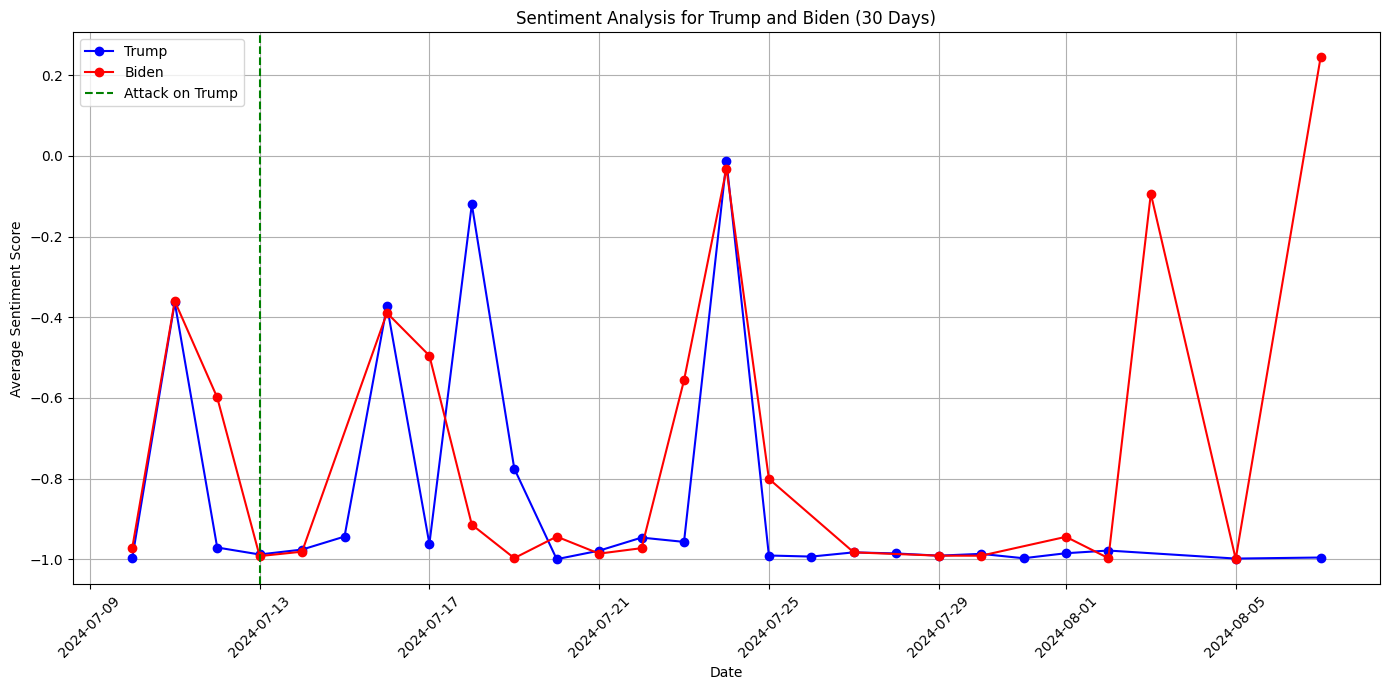

In [ ]:
 #Calculate the average sentiment for each article
import numpy as np
trump_df['average_sentiment'] = trump_df['sentiment_scores'].apply(np.mean)
biden_df['average_sentiment'] = biden_df['sentiment_scores'].apply(np.mean)

# Convert the 'publishedAt' column to datetime format
trump_df['publishedAt'] = pd.to_datetime(trump_df['publishedAt'])
biden_df['publishedAt'] = pd.to_datetime(biden_df['publishedAt'])

# Aggregate sentiment by date
trump_sentiment_daily = trump_df.groupby(trump_df['publishedAt'].dt.date)['average_sentiment'].mean()
biden_sentiment_daily = biden_df.groupby(biden_df['publishedAt'].dt.date)['average_sentiment'].mean()

# Step 5: Visualize sentiment trends
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

# Plot Trump sentiment
plt.plot(trump_sentiment_daily.index, trump_sentiment_daily.values, label='Trump', color='blue', marker='o')

# Plot Biden sentiment
plt.plot(biden_sentiment_daily.index, biden_sentiment_daily.values, label='Biden', color='red', marker='o')

# Highlight the attack date
plt.axvline(x=pd.to_datetime('2024-07-13').date(), color='green', linestyle='--', label='Attack on Trump')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.title('Sentiment Analysis for Trump and Biden (30 Days)')
plt.legend()

# Rotate date labels
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()